In [155]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

image: (512, 512)   min: 0.0   max: 0.949019607843
kernel: (32, 32)   min: 0.0   max: 0.0627450980392


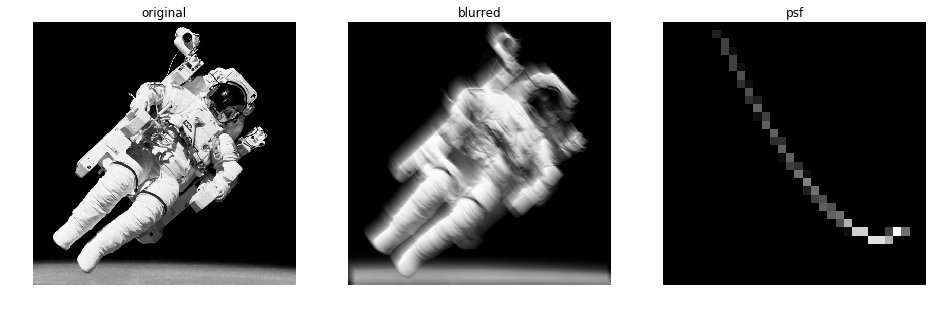

In [156]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration
from pprint import pprint

plt.rcParams["figure.figsize"] = 16, 10

original= io.imread('scaled.png')
blurred= io.imread('blurred.png')/255
kernel= np.load("swirl.npy")

print ("image:" , blurred.shape , "  min:" , np.min(blurred), "  max:" , np.max(blurred))
print ("kernel:" , kernel.shape , "  min:" , np.min(kernel), "  max:" , np.max(kernel))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 12))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(original)
ax[0].set_title('original')

ax[1].imshow(blurred)
ax[1].set_title('blurred')

ax[2].imshow(kernel)
ax[2].set_title('psf')


plt.show()

psf: (32, 32)   min: 0.001   max: 0.0637450980392
image: (512, 512)   min: -0.000117647058824   max: 0.949607843137
RL deconv #10


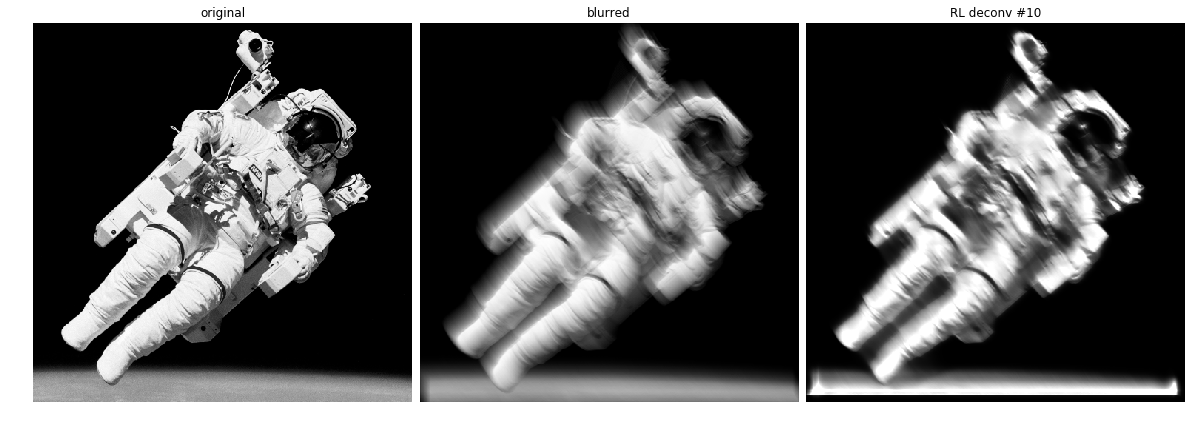

RL deconv #20


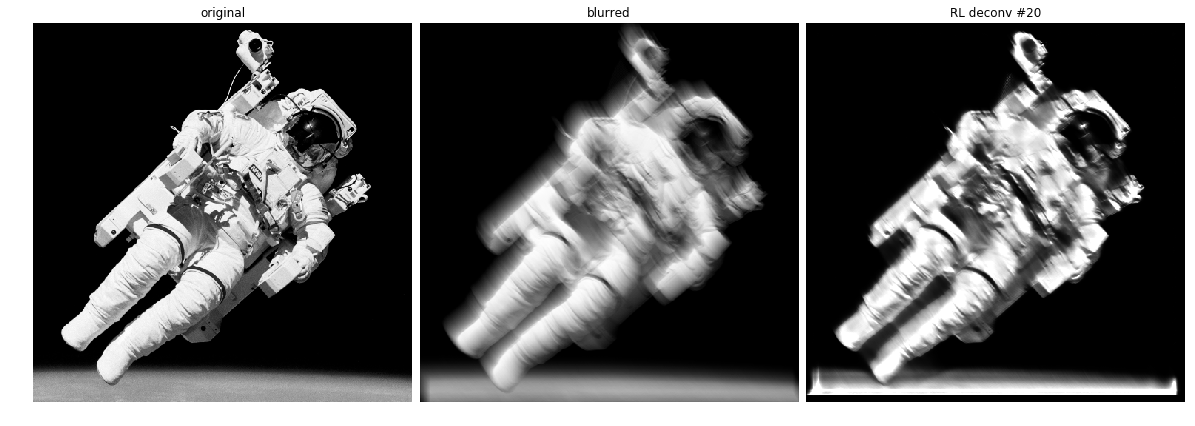

RL deconv #30


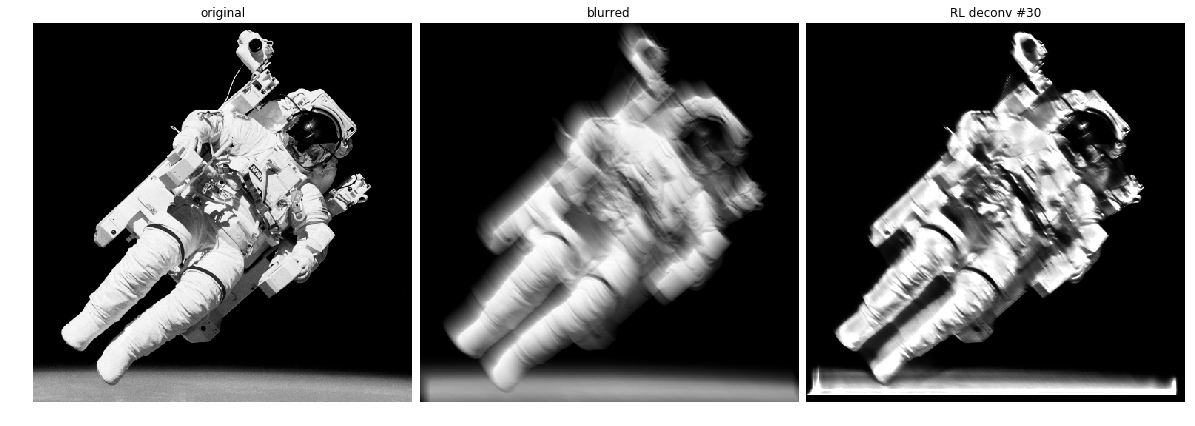

RL deconv #40


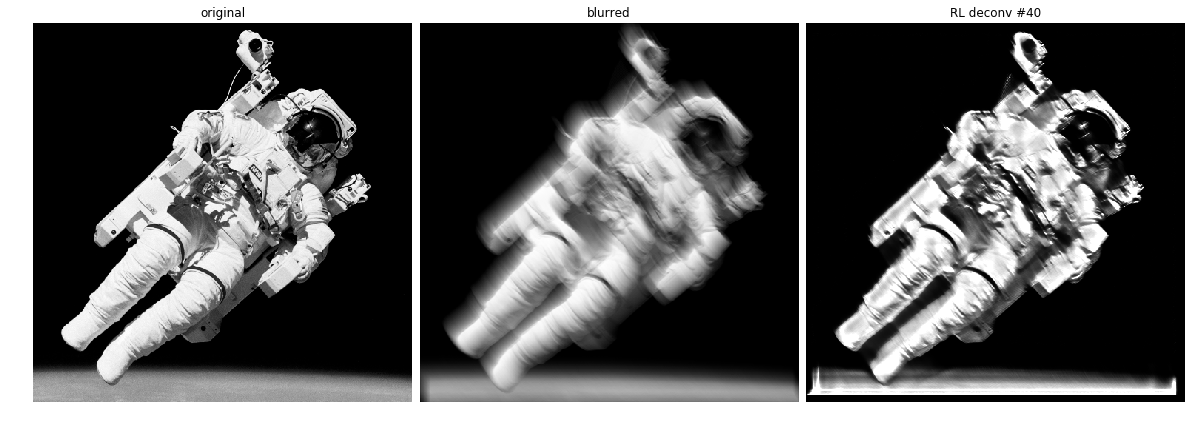

RL deconv #50


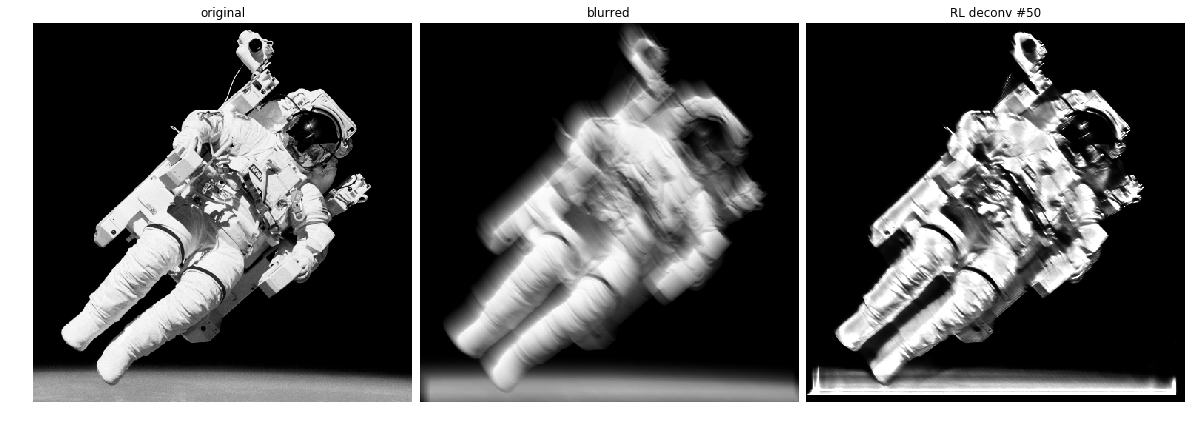

RL deconv #60


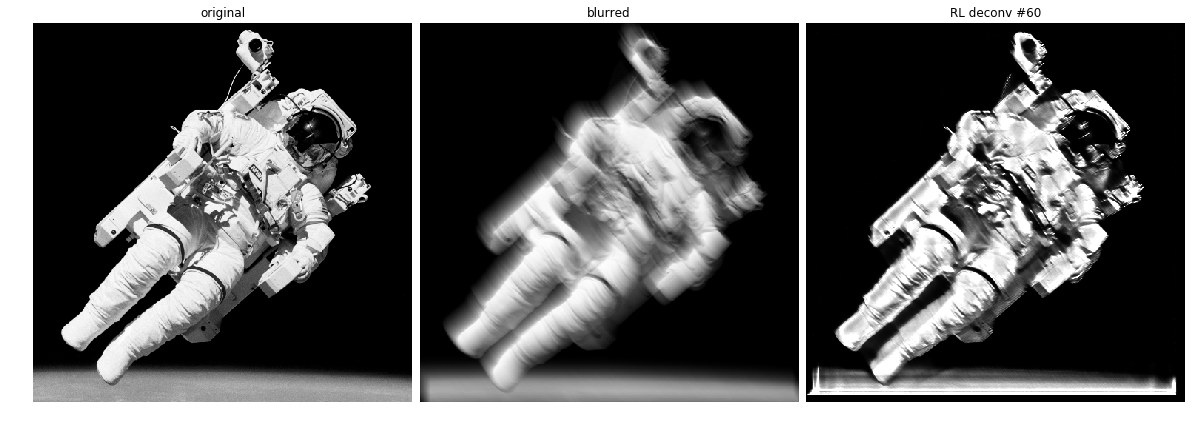

RL deconv #70


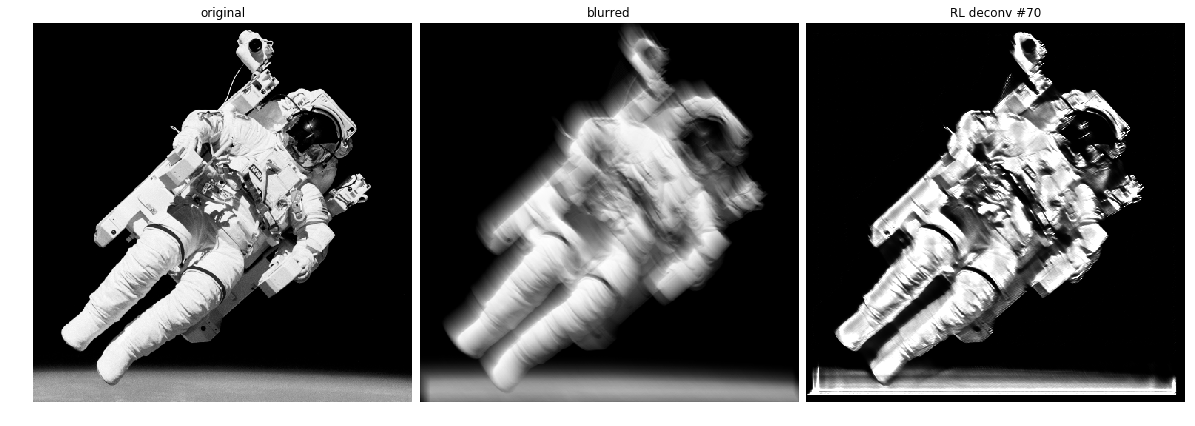

RL deconv #80


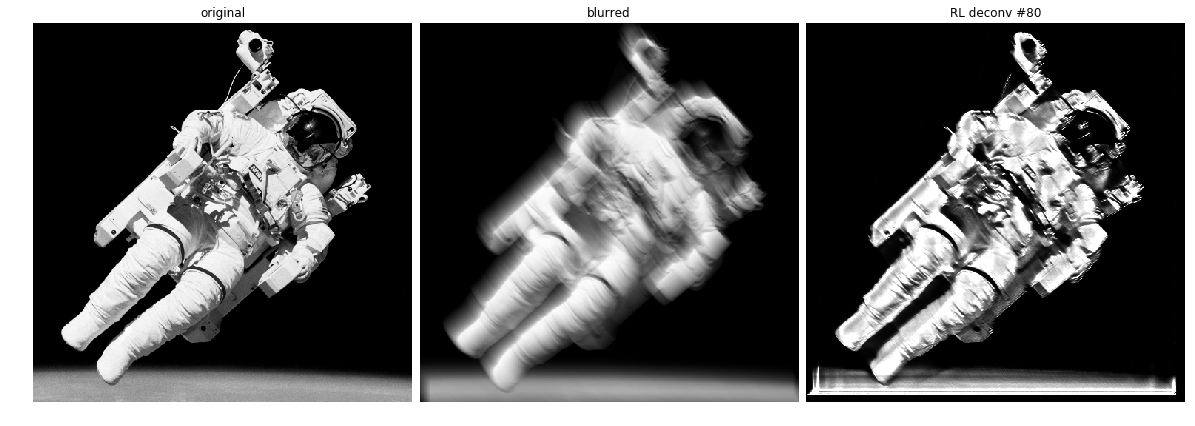

RL deconv #90


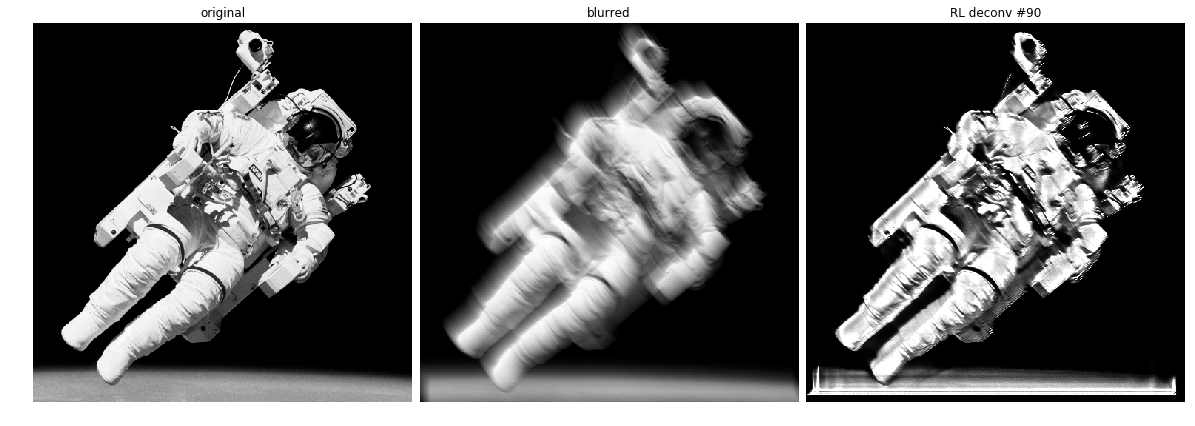

In [171]:
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration
from pprint import pprint



psf = kernel + 0.001
astro = blurred.astype(float).copy()


#astro= color.rgb2gray(data.astronaut())
#psf = np.ones((5, 5)) / 25

astro= astro.copy() + (np.random.poisson(lam=25, size=astro.shape) - 10) / 25500.



print ("psf:" , psf.shape , "  min:" , np.min(psf), "  max:" , np.max(psf))
print ("image:" , astro.shape , "  min:" , np.min(astro), "  max:" , np.max(astro))


for cycle in range(10,100,10):

    print ('RL deconv #' + str(cycle))
    
    # Restore Image using Richardson-Lucy algorithm
    deconv = restoration.richardson_lucy(astro, psf, iterations=cycle)

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 12))
    plt.gray()

    for a in (ax):
        a.axis('off')

    ax[0].imshow(original)
    ax[0].set_title('original')

    ax[1].imshow(astro)
    ax[1].set_title('blurred')

    ax[2].imshow(deconv)
    ax[2].set_title('RL deconv #' + str(cycle))


    fig.subplots_adjust(wspace=0.02, hspace=0.2,
                        top=1.9, bottom=0.05, left=0, right=1)
    plt.show()